In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('../data_storage/CNN_L8_N100.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[ 0.1728,  0.1806, -0.3228],
                        [-0.0415, -0.3434,  0.0201],
                        [-0.2995,  0.2565, -0.2372]]],
              
              
                      [[[ 0.0593,  0.3862,  0.1918],
                        [ 0.3097,  0.4388,  0.3216],
                        [ 0.2864,  0.1826, -0.1013]]],
              
              
                      [[[ 0.2286,  0.2791,  0.0329],
                        [ 0.0254,  0.0849, -0.1192],
                        [-0.1660,  0.0251,  0.0836]]],
              
              
                      [[[ 0.0363, -0.3006,  0.2370],
                        [ 0.2399,  0.0366, -0.2096],
                        [-0.0211, -0.0858, -0.3273]]],
              
              
                      [[[-0.0916,  0.3456,  0.4313],
                        [ 0.0156,  0.1323, -0.1954],
                        [ 0.2144,  0.0999, -0.1107]]]])),
             ('fc.0.weight',
            

In [3]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[ 0.1728,  0.1806, -0.3228],
          [-0.0415, -0.3434,  0.0201],
          [-0.2995,  0.2565, -0.2372]]],


        [[[ 0.0593,  0.3862,  0.1918],
          [ 0.3097,  0.4388,  0.3216],
          [ 0.2864,  0.1826, -0.1013]]],


        [[[ 0.2286,  0.2791,  0.0329],
          [ 0.0254,  0.0849, -0.1192],
          [-0.1660,  0.0251,  0.0836]]],


        [[[ 0.0363, -0.3006,  0.2370],
          [ 0.2399,  0.0366, -0.2096],
          [-0.0211, -0.0858, -0.3273]]],


        [[[-0.0916,  0.3456,  0.4313],
          [ 0.0156,  0.1323, -0.1954],
          [ 0.2144,  0.0999, -0.1107]]]])

In [4]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

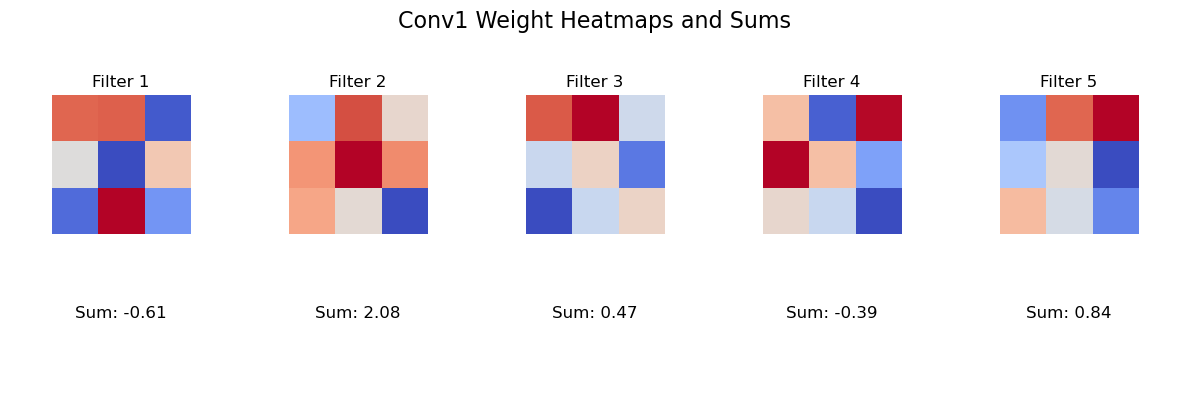

In [5]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-0.1487, -0.1152,  0.0615,  ...,  0.0470, -0.0892,  0.0531],
        [-0.0205, -0.0218,  0.0567,  ...,  0.0972, -0.0579,  0.0302],
        [ 0.0555, -0.0345, -0.1079,  ..., -0.0183,  0.0678,  0.0179],
        ...,
        [-0.0049,  0.0033, -0.0110,  ..., -0.2408, -0.0872, -0.0348],
        [ 0.0639,  0.0894, -0.0532,  ..., -0.0427, -0.1691, -0.1991],
        [-0.0057, -0.0944,  0.0224,  ..., -0.1224, -0.0537, -0.0375]])

In [7]:
fc_weight.size()

torch.Size([100, 80])

In [8]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [9]:
fc_weight_np_square

array([[-0.14872506, -0.02047247,  0.05546357, ..., -0.00491909,
         0.06390488, -0.00572632],
       [-0.11524329, -0.02180026, -0.03454639, ...,  0.00328701,
         0.08944619, -0.09435028],
       [ 0.06153871,  0.05670463, -0.10794276, ..., -0.01096967,
        -0.05323173,  0.02240987],
       ...,
       [ 0.04701369,  0.09715287, -0.01828007, ..., -0.24077693,
        -0.04271259, -0.12238539],
       [-0.08916819, -0.05792924,  0.06777424, ..., -0.08719248,
        -0.1690944 , -0.05366524],
       [ 0.05311946,  0.03015789,  0.01785367, ..., -0.03484501,
        -0.19913255, -0.03750975]], dtype=float32)

In [10]:
fc_weight_np_square.shape

(80, 100)

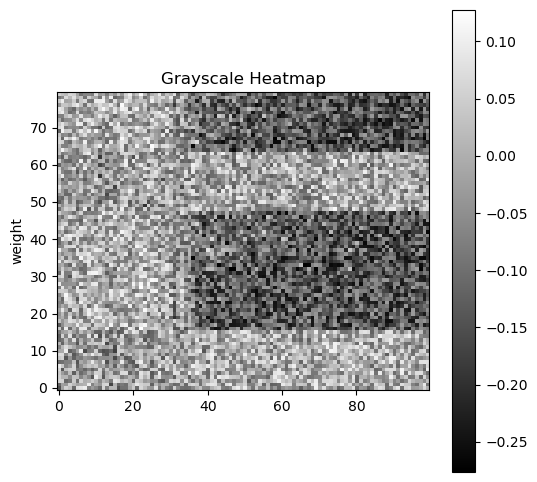

In [11]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [12]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-0.7979994 , -0.97854316, -1.1931682 , -1.6209921 , -1.1263058 ,
       -2.0080647 , -1.0203404 , -1.2451991 , -0.5239916 , -1.1709149 ,
        0.06853461, -1.4611118 , -0.5116225 , -3.16019   , -1.3302358 ,
       -2.3310847 , -1.5930791 ,  0.3981218 , -0.43125945, -1.4312088 ,
       -1.2938781 , -0.66858727,  0.7805916 , -0.37094724, -1.1491588 ,
       -0.6181576 , -0.20664322, -1.287784  , -2.1943455 , -0.24748491,
       -1.0186793 , -5.076522  , -2.959072  , -1.5635706 , -4.0187955 ,
       -2.8264453 , -3.7992802 , -4.3971744 , -5.9190216 , -6.3897095 ,
       -5.866652  , -5.0945945 , -5.8681607 , -6.3197174 , -5.8373394 ,
       -6.019739  , -6.2032843 , -7.2741113 , -5.67505   , -5.475064  ,
       -5.496832  , -6.5062885 , -7.340208  , -6.917181  , -7.295657  ,
       -6.4183674 , -6.8370547 , -6.7231493 , -7.2191114 , -7.6215944 ,
       -6.27339   , -6.8441496 , -5.933013  , -6.3818808 , -7.4322906 ,
       -6.902151  , -6.372835  , -7.5020733 , -7.706419  , -6.74

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = [x for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# tanh関数の定義
def tanh_function(x, a, b):
    return a * np.tanh(b * x)

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y)

# 推定されたパラメータを使用して近似線を計算
y_fit = tanh_function(x, *params)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.plot(x, y_fit, label='tanh', linestyle='--', color='red')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

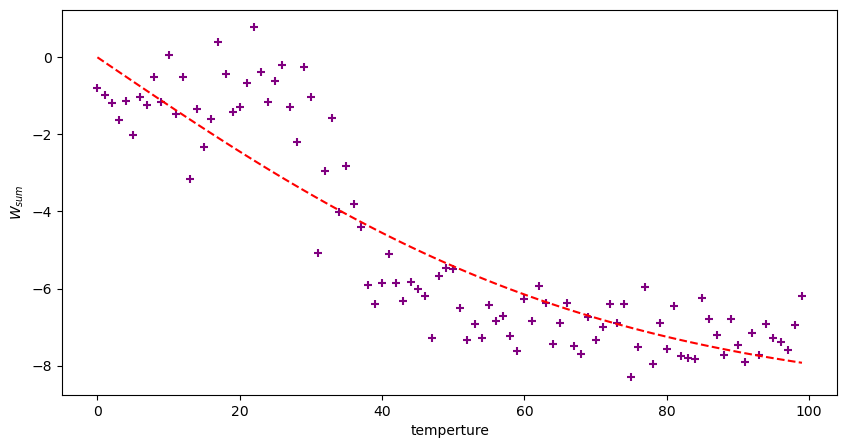

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.arange(len(fc_weight_np_square_sum))  # xをNumPy配列に変換
y = fc_weight_np_square_sum

# tanh関数の定義
def tanh_function(x, a, b):
    return a * np.tanh(b * x)

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y)

# 推定されたパラメータを使用して近似線を計算
y_fit = tanh_function(x, *params)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.plot(x, y_fit, label='tanh', linestyle='--', color='red')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')
plt.show()


c:\Users\sugay\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sugay\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sugay\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22259 (\N{CJK UNIFIED IDEOGRAPH-56F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sugay\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sugay\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

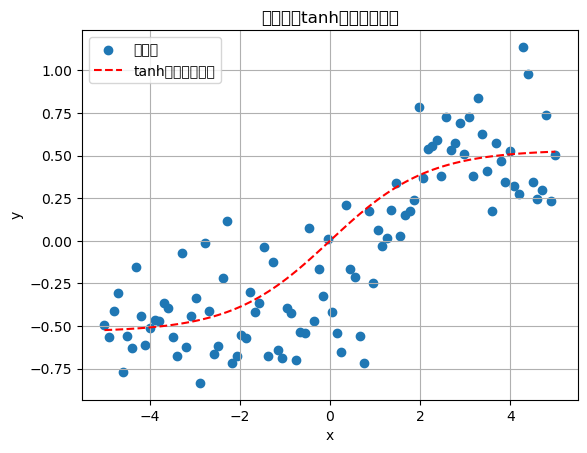

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 散布図のデータ（xとy）を用意する必要があります
# 以下は仮のデータです。実際のデータを使用してください。
x = np.linspace(-5, 5, 100)
y_scatter = 0.5 * np.tanh(x - 1) + 0.2 * np.random.randn(100)  # 仮の散布図データ

# tanh関数の定義
def tanh_function(x, a, b):
    return a * np.tanh(b * x)

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y_scatter)

# 推定されたパラメータを使用して近似線を計算
y_fit = tanh_function(x, *params)

# グラフの描画
plt.scatter(x, y_scatter, label='散布図')
plt.plot(x, y_fit, label='tanh関数の近似線', linestyle='--', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('散布図とtanh関数の近似線')
plt.grid(True)
plt.show()


In [14]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664,
 0.04,
 0.038461538461538464,
 0.037037037037037035,
 0.03571428571428571,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.029411764705882353,
 0.02857142857142857,
 0.027777777777777776,
 0.02702702702702703,
 0.02631578947368421,
 0.02564102564102564,
 0.025,
 0.024390243902439025,
 0.023809523809523808,
 0.023255813953488372,
 0.022727272727272728,
 0.022222222222222223,
 0.021739130434782608,
 0.02127659574468085,
 0.020833333333333332,
 0.02040816326530612,
 0.02,
 0.0196078431372549,
 0.019230769230769232,
 0.0188679245

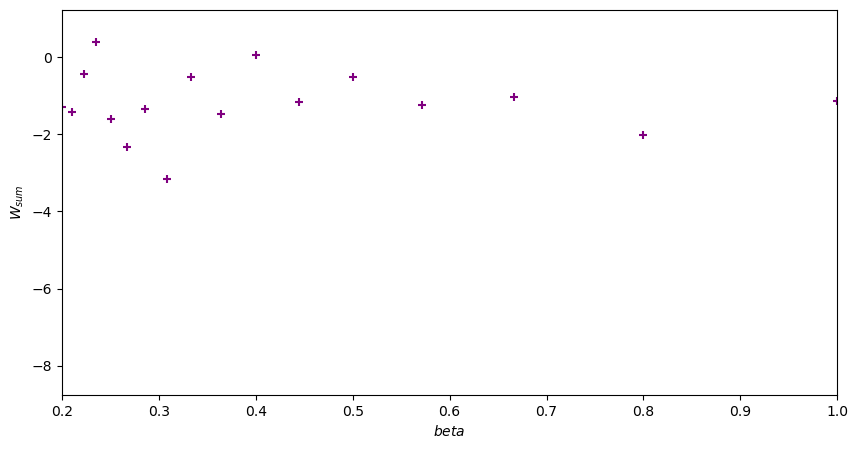

In [15]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()